In [1]:
# Tools and library used

# Keras: Keras has an Image Data Preprocessing class that allows us to perform data augmentation seamlessly. 
# Matplotlib: One of the most popular data visualization libraries in Python. It allows us to create figures and plots and makes it very easy to produce static raster or vector files without the need for any GUIs.
# Numpy: A very useful library for performing mathematical and logical operations on Arrays. We’ll be using its expand_dim class to expand the shape of an array in this tutorial.

# from keras.preprocessing import image
 
# img = image.load_img('train/'+train['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
 
# 	img = image.img_to_array(img)
# 	img = img/255

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))


170508288/170498071 [==============================] - 3s 0us/step
Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)
Epoch 1/10
391/391 [==============================] - 541s 1s/step - loss: 1.5707 - accuracy: 0.4223 - val_loss: 1.1963 - val_accuracy: 0.5771
Epoch 2/10
391/391 [==============================] - 539s 1s/step - loss: 1.0866 - accuracy: 0.6179 - val_loss: 0.9627 - val_accuracy: 0.6758
Epoch 3/10
391/391 [==============================] - 536s 1s/step - loss: 0.9018 - accuracy: 0.6856 - val_loss: 0.7882 - val_accuracy: 0.7279
Epoch 4/10
391/391 [==============================] - 536s 1s/step - loss: 0.7881 - accuracy: 0.7255 - val_loss: 0.7377 - val_accuracy: 0.7495
Epoch 5/10
391/391 [==============================] - 534s 1s/step - loss: 0.7070 - accuracy: 0.7536 - val_loss: 0.7092 - val_accuracy: 0.7507
Epoch 6/10
391/391 [==============================] - 533s 1s/step - loss: 0.6420 - accuracy: 0.7738 - val_loss: 0.6864 - val_accura

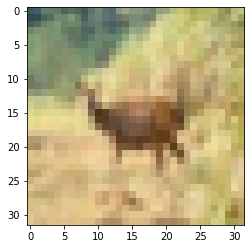

In [8]:
import matplotlib.pyplot as plt
import numpy as np
img = X_test[130]
test_img = img.reshape((1,3072))
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
# img_class = model.predict_classes(test_img)
# prediction = img_class[0]
# classname = img_class[0]
# print("Class: ",classname)
# img = img.reshape((28,28))
plt.imshow(img)
# plt.title(classname)
# plt.show()

In [10]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])